In [3]:
import pandas as pd
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
import seaborn as sns
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
import os
from random import shuffle
from tensorflow.keras.models import Model
from tqdm import tqdm
import glob
from tensorflow.keras.applications import ResNet50
from keras.utils import model_to_dot
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from IPython.display import SVG
from keras.utils import plot_model
import cv2 as cv
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import load_img
import matplotlib

In [4]:
size = 224
path = "blood-cells/dataset2-master/dataset2-master/images/TRAIN/"

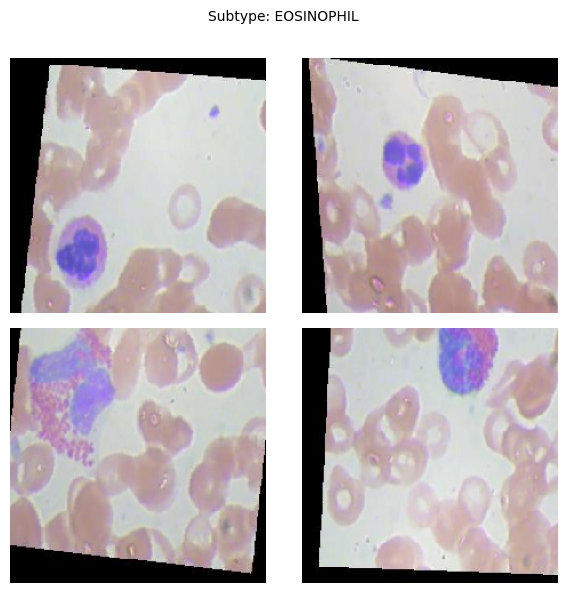

In [52]:
subtype = 'EOSINOPHIL'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: EOSINOPHIL', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

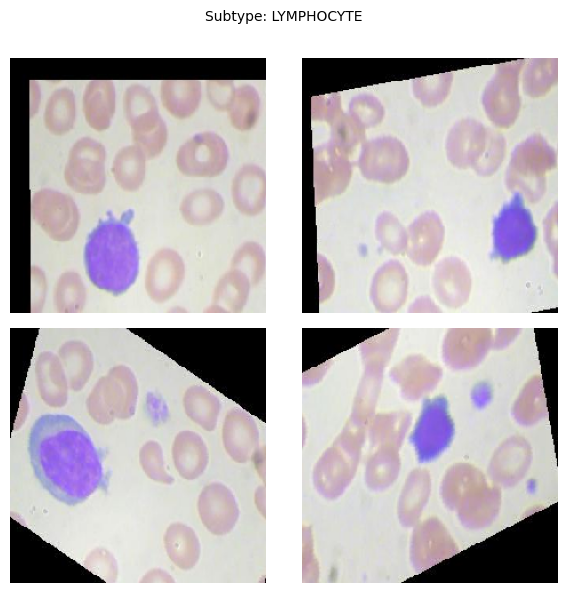

In [8]:
subtype = 'LYMPHOCYTE'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: LYMPHOCYTE', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

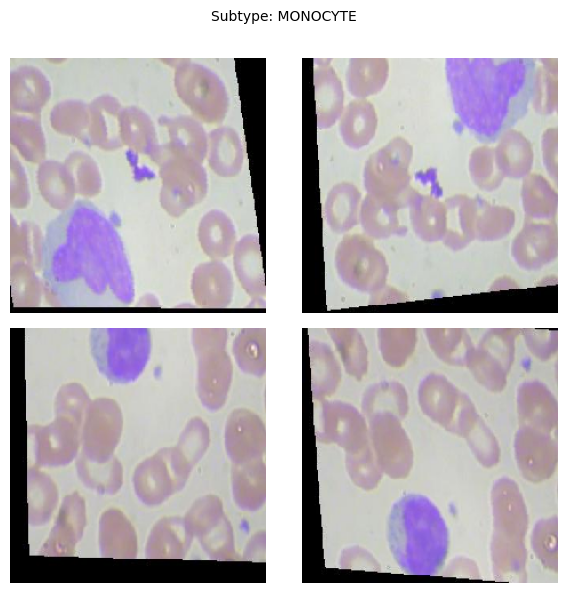

In [7]:
subtype = 'MONOCYTE'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: MONOCYTE', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

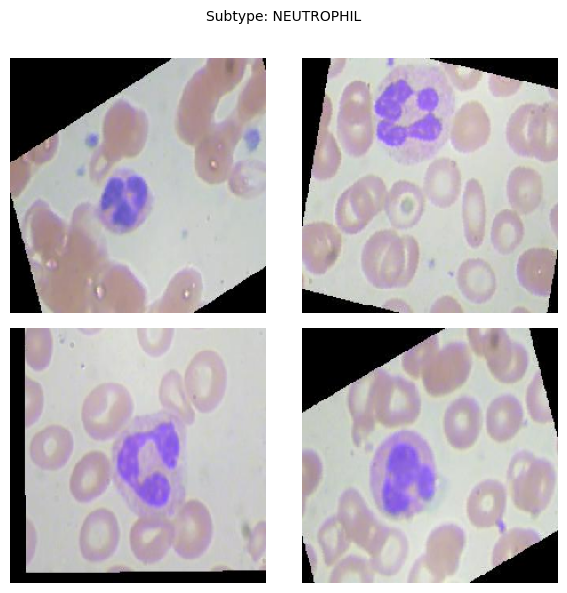

In [9]:
subtype = 'NEUTROPHIL'

plt.figure(figsize=(6, 6))
plt.suptitle('Subtype: NEUTROPHIL', fontsize=10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = load_img(path + subtype + "/" + os.listdir(path + subtype)[i], target_size=(size, size))
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [10]:
dirlist=['blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL', 
         'blood-cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE',
         'blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE',
         'blood-cells/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL']

classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

filepaths=[]; labels=[]

for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)

In [11]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)

In [12]:
df

,filepaths,labels
0,../input/blood-cells/dataset2-master/dataset2-...,EOSINOPHIL
1,../input/blood-cells/dataset2-master/dataset2-...,EOSINOPHIL
2,../input/blood-cells/dataset2-master/dataset2-...,EOSINOPHIL
3,../input/blood-cells/dataset2-master/dataset2-...,EOSINOPHIL
4,../input/blood-cells/dataset2-master/dataset2-...,EOSINOPHIL
...,...,...
9952,../input/blood-cells/dataset2-master/dataset2-...,NEUTROPHIL
9953,../input/blood-cells/dataset2-master/dataset2-...,NEUTROPHIL
9954,../input/blood-cells/dataset2-master/dataset2-...,NEUTROPHIL
9955,../input/blood-cells/dataset2-master/dataset2-...,NEUTROPHIL


In [13]:
print('Total number of images in the datase:', df.shape[0])

Total number of images in the datase: 9957


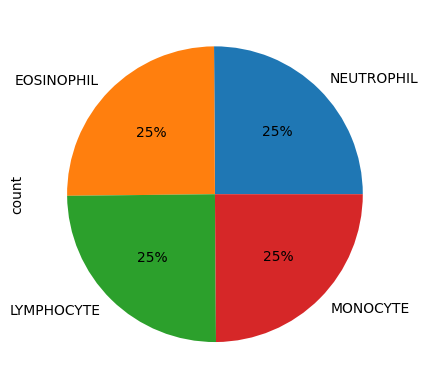

In [14]:
df['labels'].value_counts().plot(kind="pie", autopct='%.0f%%')
plt.show()

In [15]:
df['labels'].value_counts()

labels
NEUTROPHIL    2499
EOSINOPHIL    2497
LYMPHOCYTE    2483
MONOCYTE      2478
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])

In [17]:
df

,filepaths,labels
0,../input/blood-cells/dataset2-master/dataset2-...,0
1,../input/blood-cells/dataset2-master/dataset2-...,0
2,../input/blood-cells/dataset2-master/dataset2-...,0
3,../input/blood-cells/dataset2-master/dataset2-...,0
4,../input/blood-cells/dataset2-master/dataset2-...,0
...,...,...
9952,../input/blood-cells/dataset2-master/dataset2-...,3
9953,../input/blood-cells/dataset2-master/dataset2-...,3
9954,../input/blood-cells/dataset2-master/dataset2-...,3
9955,../input/blood-cells/dataset2-master/dataset2-...,3


In [18]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,filepaths,labels
0,../input/blood-cells/dataset2-master/dataset2-...,1
1,../input/blood-cells/dataset2-master/dataset2-...,1
2,../input/blood-cells/dataset2-master/dataset2-...,2
3,../input/blood-cells/dataset2-master/dataset2-...,1
4,../input/blood-cells/dataset2-master/dataset2-...,1
...,...,...
9952,../input/blood-cells/dataset2-master/dataset2-...,2
9953,../input/blood-cells/dataset2-master/dataset2-...,2
9954,../input/blood-cells/dataset2-master/dataset2-...,2
9955,../input/blood-cells/dataset2-master/dataset2-...,0


In [19]:
def process_image(image_path):
    """Load and resize an image from the given path."""
    resized_image = load_img(image_path, target_size=(75, 75))
    return img_to_array(resized_image)

image_data = []
image_labels = []

for _, record in df.iterrows():
    image_path = record['filepaths']
    image_label = record['labels']

    image_data.append(process_image(image_path))
    image_labels.append(image_label)

In [20]:
image_data[0:3]

[array([[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        ...,
 
        [[225., 227., 222.],
         [225., 227., 226.],
         [228., 230., 225.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[226., 228., 225.],
         [218., 219., 221.],
         [229., 231., 228.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[216., 218., 217.],
 

In [21]:
image_data = np.array(image_data, dtype="float32") / 255.0
image_labels = np.array(image_labels)

In [22]:
num_classes = len(classes)
image_labels = to_categorical(image_labels, num_classes=num_classes)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, 
                                                    random_state=42, stratify=image_labels)

In [24]:
x_train.shape

(7965, 75, 75, 3)

In [25]:
x_test.shape

(1992, 75, 75, 3)

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,708 (3.42 MB)

 Trainable params: 896,708 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.2837 - loss: 1.3848 - val_accuracy: 0.4890 - val_loss: 1.1425
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4561 - loss: 1.1535 - val_accuracy: 0.6496 - val_loss: 0.8259
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6388 - loss: 0.7981 - val_accuracy: 0.7118 - val_loss: 0.6252
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6993 - loss: 0.6542 - val_accuracy: 0.7520 - val_loss: 0.5464
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7374 - loss: 0.5790 - val_accuracy: 0.7816 - val_loss: 0.4910
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7692 - loss: 0.5194 - val_accuracy: 0.7992 - val_loss: 0.4506
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8065 - loss: 0.4488 - val_accuracy: 0.8002 - val_loss: 0.4491
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8274 - loss: 0.3961 - val_accuracy: 

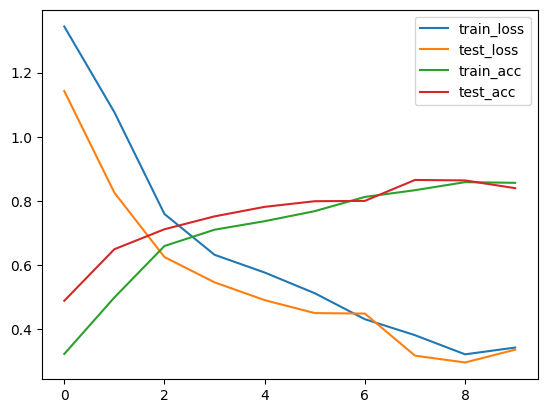

In [29]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

In [40]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [41]:
input_shape = (75, 75, 3)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 75, 75, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 81, 81, 3)      │              0 │ input_layer_8[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 38, 38, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 38, 38, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 38, 38, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 40, 40, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 19, 19, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 19, 19, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 19, 19, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 19, 19, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 19, 19, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 19, 19, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 19, 19, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 19, 19, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,169,220 (27.35 MB)

 Trainable params: 131,716 (514.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [42]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 50s 119ms/step - accuracy: 0.4050 - loss: 1.4886 - val_accuracy: 0.6486 - val_loss: 0.8728
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5866 - loss: 0.9549 - val_accuracy: 0.7108 - val_loss: 0.7604
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6456 - loss: 0.8394 - val_accuracy: 0.7294 - val_loss: 0.6864
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6822 - loss: 0.7696 - val_accuracy: 0.7410 - val_loss: 0.6625
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6979 - loss: 0.7221 - val_accuracy: 0.7485 - val_loss: 0.6315
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7199 - loss: 0.6803 - val_accuracy: 0.7555 - val_loss: 0.5947
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7192 - loss: 0.6664 - val_accuracy: 0.7610 - val_loss: 0.5841
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7316 - loss: 0.6270 - val_ac

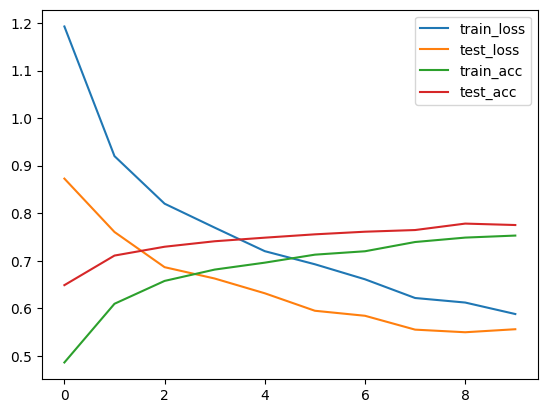

In [43]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

In [44]:
from tensorflow.keras.applications import InceptionV3

In [45]:
input_shape = (75, 75, 3)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 75, 75, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 37, 37, 32)     │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 37, 37, 32)     │             96 │ conv2d_60[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 37, 37, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 35, 35, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 35, 35, 32)     │             96 │ conv2d_61[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 35, 35, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 35, 35, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 35, 35, 64)     │            192 │ conv2d_62[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 35, 35, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_25          │ (None, 17, 17, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 17, 17, 80)     │          5,120 │ max_pooling2d_25[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 17, 17, 80)     │            240 │ conv2d_63[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 17, 17, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 15, 15, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 15, 15, 192)    │            576 │ conv2d_64[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 22,065,572 (84.17 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [46]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.3735 - loss: 1.4166 - val_accuracy: 0.5065 - val_loss: 1.1197
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4914 - loss: 1.1428 - val_accuracy: 0.5462 - val_loss: 1.0349
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5385 - loss: 1.0593 - val_accuracy: 0.5698 - val_loss: 1.0271
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5692 - loss: 1.0036 - val_accuracy: 0.5768 - val_loss: 0.9847
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5869 - loss: 0.9662 - val_accuracy: 0.6054 - val_loss: 0.9403
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6121 - loss: 0.9091 - val_accuracy: 0.5999 - val_loss: 0.9311
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6301 - loss: 0.8698 - val_accuracy: 0.6094 - val_loss: 0.9285
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6396 - loss: 0.8545 - val_acc

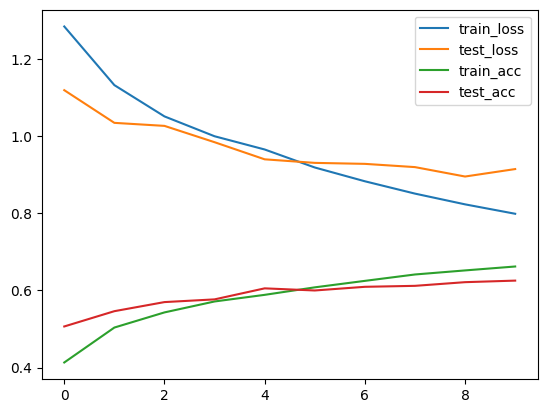

In [47]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()

In [48]:
from tensorflow.keras.applications import Xception

In [49]:
input_shape = (75, 75, 3)
num_classes = 4
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 75, 75, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 37, 37, 32)     │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 37, 37, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 37, 37, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 35, 35, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 35, 35, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 35, 35, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 35, 35, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 35, 35, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 35, 35, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 35, 35, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 35, 35, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_154 (Conv2D)       │ (None, 18, 18, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 18, 18, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [50]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.3264 - loss: 1.4259 - val_accuracy: 0.5030 - val_loss: 1.1662
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4450 - loss: 1.2122 - val_accuracy: 0.5361 - val_loss: 1.0852
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.4964 - loss: 1.1278 - val_accuracy: 0.5497 - val_loss: 1.0543
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5142 - loss: 1.0854 - val_accuracy: 0.5607 - val_loss: 1.0212
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5442 - loss: 1.0394 - val_accuracy: 0.6009 - val_loss: 0.9657
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5778 - loss: 0.9981 - val_accuracy: 0.6130 - val_loss: 0.9189
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5759 - loss: 0.9742 - val_accuracy: 0.6160 - val_loss: 0.9085
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5932 - loss: 0.9443 - val_acc

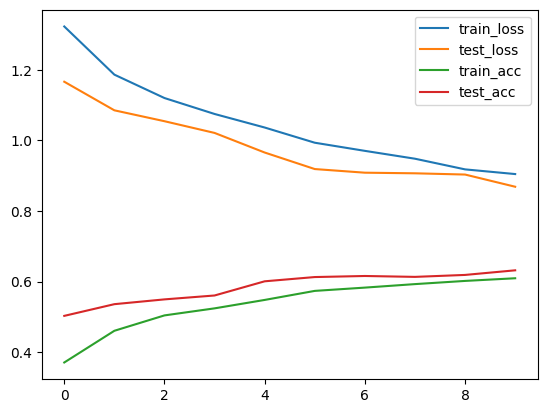

In [51]:
plt.plot(history.history['loss'], label='train_loss') 
plt.plot(history.history['val_loss'], label='test_loss') 
plt.plot(history.history['accuracy'], label='train_acc') 
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend() 
plt.show()